In [45]:
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

In [46]:
data = pd.read_csv('Social_Network_Ads.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [47]:
data.shape

(400, 5)

In [48]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [49]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [50]:
selected_col = data[['EstimatedSalary']]

In [51]:
sc = StandardScaler()

scaled_col = sc.fit_transform(selected_col)

In [52]:
# forming the clusters

clusters = []

for i in range(1, 25):
  kmeans = KMeans(n_clusters = i, n_init=10, random_state=10)
  kmeans.fit(scaled_col)
  clusters.append(kmeans.inertia_)

In [53]:
clusters

[400.0000000000001,
 142.44273102205358,
 51.29785089171938,
 28.85213178215662,
 17.231547504856202,
 12.66220412226702,
 8.728550441843154,
 6.945307274996547,
 5.46764112221585,
 4.486205373161767,
 3.6073402985736474,
 2.765550246160579,
 2.4028877704693525,
 2.0595692262021075,
 1.8610500351289168,
 1.685560510572137,
 1.4851403680072566,
 1.2954300501449567,
 1.214473011749023,
 1.0531080745397956,
 0.931920725466267,
 0.8534234152211064,
 0.7566410001216731,
 0.6711524048329935]

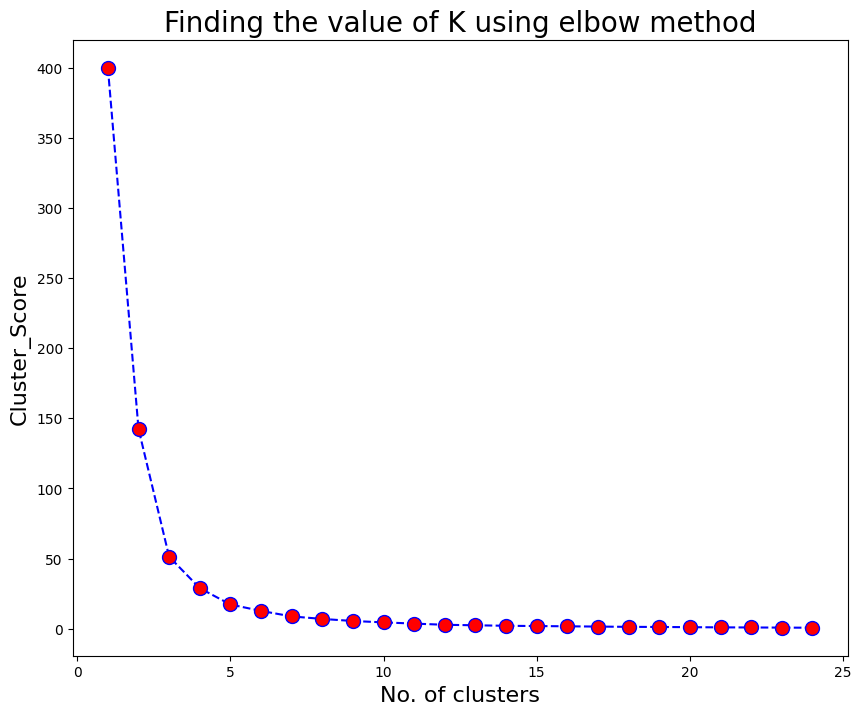

In [54]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 25), clusters, color='blue', marker='o', linestyle='--', markerfacecolor='red', markersize=10)
plt.title('Finding the value of K using elbow method', fontsize=20)
plt.xlabel('No. of clusters', fontsize=16)
plt.ylabel('Cluster_Score', fontsize=16)
plt.show()

In [55]:
# The elbow method is used for finding the number of clusters
# from the above visualization, we can conclude that the number of clusters are 4

In [56]:
kmeans =KMeans(n_clusters= 4, random_state=10)

In [57]:
kmeans.fit(scaled_col)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=10)

In [58]:
pred = kmeans.predict(scaled_col)

In [59]:
pred

array([0, 0, 2, 2, 3, 2, 3, 1, 0, 2, 3, 2, 3, 0, 3, 3, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 2, 0, 3, 1, 0, 2, 3, 0, 0, 2, 3, 0, 0, 2, 1, 0,
       3, 0, 3, 2, 1, 3, 0, 2, 3, 0, 2, 2, 2, 3, 0, 1, 0, 3, 2, 1, 3, 2,
       0, 3, 2, 3, 3, 0, 0, 1, 0, 1, 2, 0, 3, 0, 3, 2, 2, 3, 2, 1, 2, 3,
       3, 2, 3, 1, 0, 0, 3, 2, 0, 1, 3, 0, 3, 2, 3, 1, 0, 3, 0, 3, 3, 3,
       3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 0, 0, 3, 2, 0,
       3, 3, 2, 2, 3, 1, 2, 0, 3, 3, 2, 3, 0, 3, 3, 0, 2, 3, 0, 2, 3, 2,
       2, 0, 2, 3, 0, 1, 3, 3, 0, 0, 3, 3, 2, 3, 1, 2, 3, 1, 1, 2, 3, 0,
       2, 0, 0, 0, 0, 3, 1, 2, 2, 2, 3, 2, 3, 0, 3, 0, 2, 3, 3, 2, 3, 0,
       3, 0, 0, 3, 1, 3, 3, 2, 1, 1, 1, 0, 3, 1, 2, 2, 2, 1, 2, 3, 3, 1,
       3, 3, 1, 3, 2, 2, 1, 1, 3, 3, 1, 2, 1, 3, 1, 3, 2, 3, 3, 1, 1, 2,
       3, 1, 3, 1, 2, 1, 2, 3, 0, 2, 1, 1, 2, 3, 3, 2, 3, 1, 3, 1, 1, 3,
       3, 1, 3, 3, 1, 2, 1, 3, 2, 1, 0, 3, 3, 3, 0, 0, 3, 2, 3, 0, 1, 3,
       2, 1, 3, 3, 1, 3, 0, 3, 2, 2, 3, 1, 3, 1, 0,

In [60]:
data['cluster'] = pred

In [61]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,cluster
0,15624510,Male,19,19000,0,0
1,15810944,Male,35,20000,0,0
2,15668575,Female,26,43000,0,2
3,15603246,Female,27,57000,0,2
4,15804002,Male,19,76000,0,3


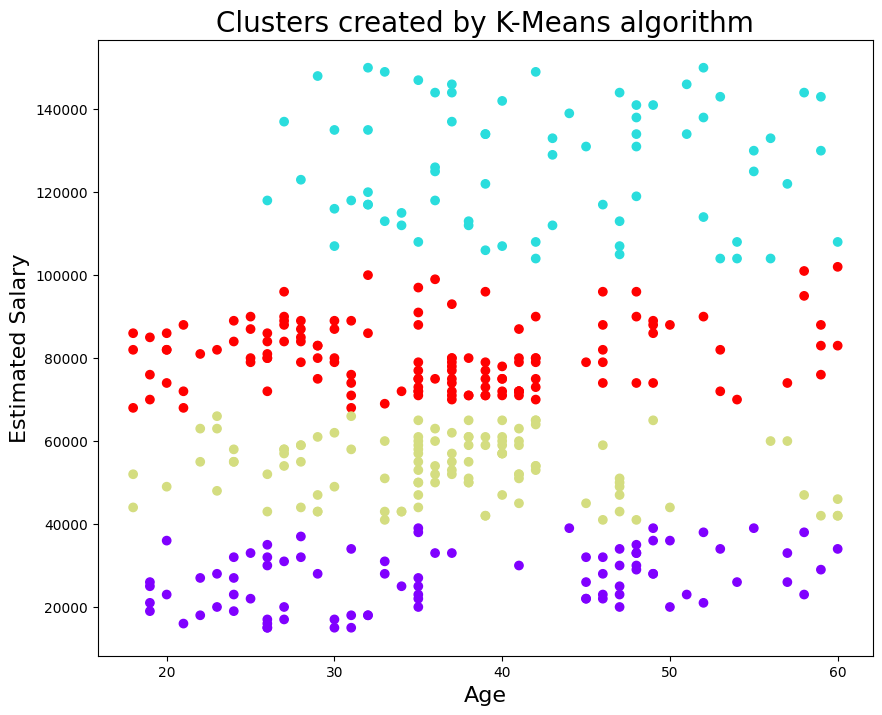

In [66]:
plt.figure(figsize=(10, 8))
plt.scatter(data['Age'], selected_col, c = data['cluster'], cmap='rainbow', marker= 'o')
plt.title('Clusters created by K-Means algorithm', fontsize=20)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Estimated Salary', fontsize=16)
plt.show()